# Fraud Detection – Exploratory Data Analysis (EDA)

Using the **cleaned** dataset 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", font_scale=1.2)
plt.rcParams["figure.figsize"] = (12, 8)

df = pd.read_csv('../data/cleaned_transactions_for_eda.csv', parse_dates=['timestamp'])

print(f"Loaded clean data: {df.shape}")
print(f"Fraud rate: {df['is_fraud'].mean():.4%}")

C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Loaded clean data: (11140, 32)
Fraud rate: 8.9138%


### 1. Fraud Rate by Channel (Now Clean!)

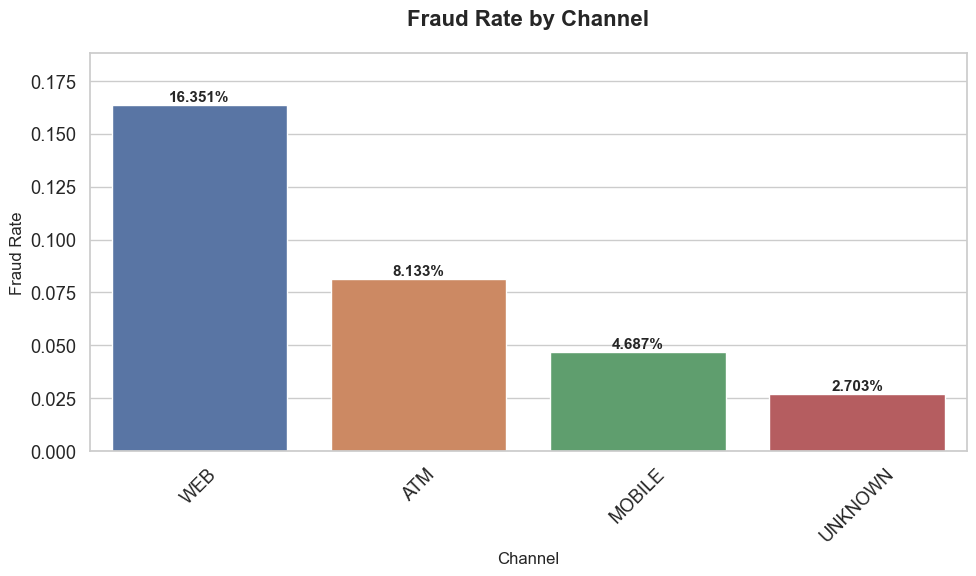

In [3]:

import matplotlib.pyplot as plt
import seaborn as sns

# Fraud rate by channel
fraud_by_channel = df.groupby('channel')['is_fraud'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))

ax = sns.barplot(
    data=fraud_by_channel.reset_index(),
    x='channel',
    y='is_fraud',
    order=fraud_by_channel.index
)

plt.title('Fraud Rate by Channel', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('Channel', fontsize=12)
plt.ylim(0, fraud_by_channel.max() * 1.15)

# Add percentage labels on top of bars
for i, v in enumerate(fraud_by_channel.values):
    plt.text(
        i, v + fraud_by_channel.max() * 0.01,
        f'{v:.3%}',
        ha='center', fontsize=11, fontweight='bold'
    )

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 2. Top Risky Countries, KYC, New Device, etc.

Similar clean plots as before but now on clean data...


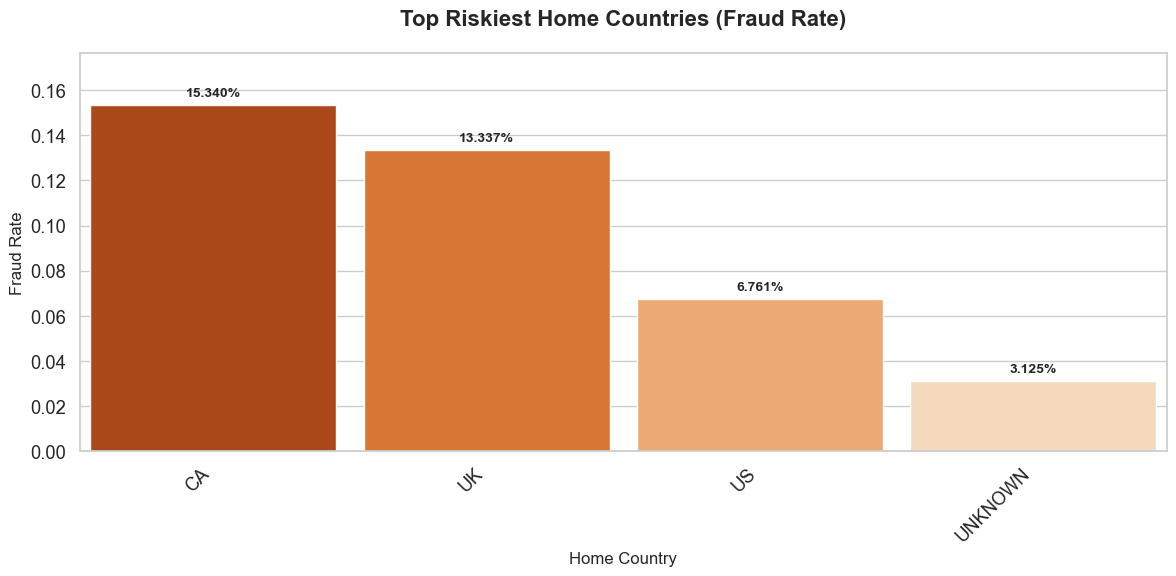

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud Rate by Home Country (Top 15)
plt.figure(figsize=(12, 6))

# Calculate fraud rate and keep top 15
fraud_by_country = (
    df.groupby('home_country')['is_fraud']
    .mean()
    .sort_values(ascending=False)
    .head(15)
)

# Plot (no hue = no legend + tighter bars)
ax = sns.barplot(
    data=fraud_by_country.reset_index(),
    x='home_country',
    y='is_fraud',
    order=fraud_by_country.index,
    palette='Oranges_r',
    width=0.9
)

# Titles and axes
plt.title('Top Riskiest Home Countries (Fraud Rate)', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('Home Country', fontsize=12)
plt.ylim(0, fraud_by_country.max() * 1.15)

# Add percentage labels on top of each bar (using ax.patches for accuracy)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3%}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=10, fontweight='bold',
        xytext=(0, 4), textcoords='offset points'
    )

plt.xticks(rotation=45, ha='right')
ax.margins(x=0.01)  # reduces extra space at plot edges
plt.tight_layout()
plt.show()


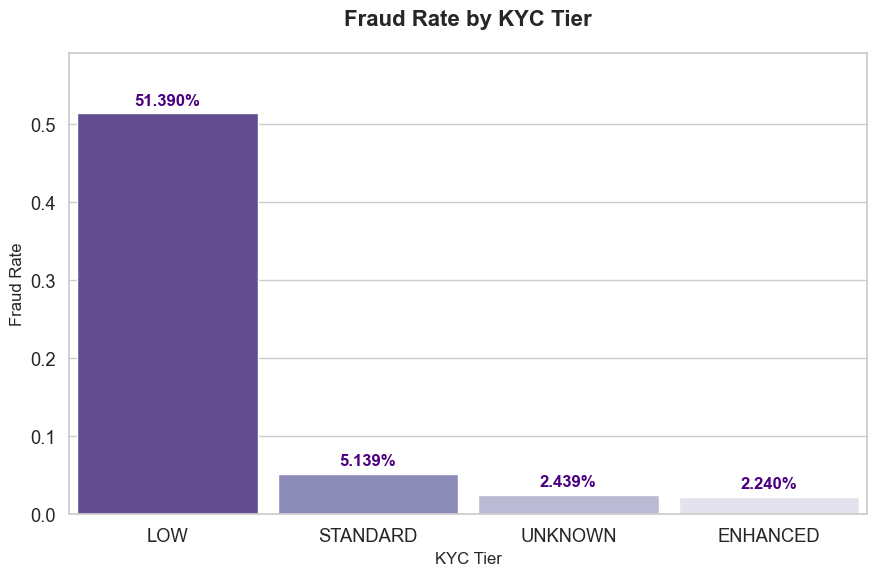

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Fraud Rate by KYC Tier
plt.figure(figsize=(9, 6))

fraud_by_kyc = (
    df.groupby('kyc_tier')['is_fraud']
    .mean()
    .sort_values(ascending=False)
)

# Plot without hue (keeps colours, removes legend + spacing issues)
ax = sns.barplot(
    data=fraud_by_kyc.reset_index(),
    x='kyc_tier',
    y='is_fraud',
    order=fraud_by_kyc.index,
    palette='Purples_r',
    width=0.9
)

# Titles and labels
plt.title('Fraud Rate by KYC Tier', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('KYC Tier', fontsize=12)
plt.ylim(0, fraud_by_kyc.max() * 1.15)

# Add percentage labels on bars (deep purple / indigo)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3%}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center',
        va='bottom',
        fontsize=12,
        fontweight='bold',
        color='#4B0082',  # deep purple / indigo
        xytext=(0, 4),
        textcoords='offset points'
    )

ax.margins(x=0.01)
plt.tight_layout()
plt.show()


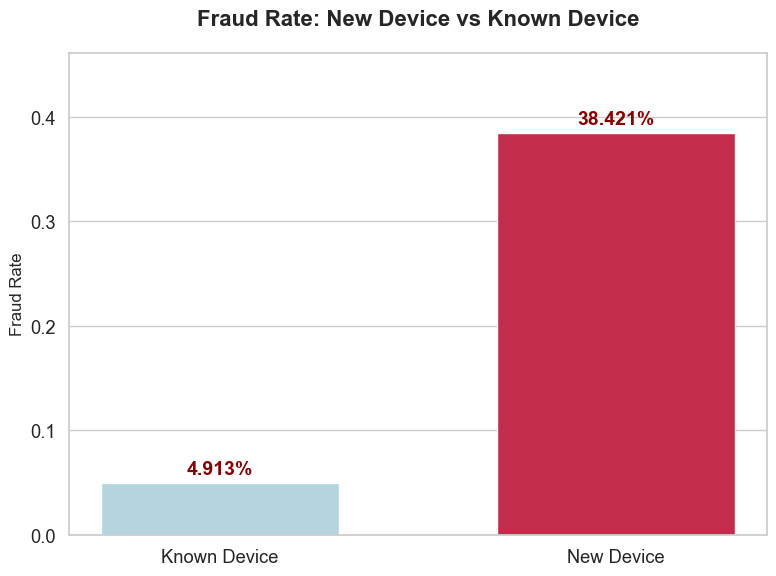

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Fraud Rate: New Device vs Known Device
plt.figure(figsize=(8, 6))

# Calculate fraud rate by new_device flag (0 = known, 1 = new)
fraud_by_new = df.groupby('new_device')['is_fraud'].mean()

# Build a plotting DataFrame with explicit labels
plot_df = pd.DataFrame({
    'Device Type': ['Known Device', 'New Device'],
    'Fraud Rate': fraud_by_new.reindex([0, 1]).values
})

# Plot WITHOUT hue to avoid legend/spacing issues
ax = sns.barplot(
    data=plot_df,
    x='Device Type',
    y='Fraud Rate',
    palette=['lightblue', 'crimson'],
    width=0.6
)

# Titles and labels
plt.title(
    'Fraud Rate: New Device vs Known Device',
    fontsize=16, fontweight='bold', pad=20
)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('')

# Add bold percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3%}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=14, fontweight='bold',
        color='darkred',
        xytext=(0, 4),
        textcoords='offset points'
    )

plt.ylim(0, max(plot_df['Fraud Rate']) * 1.2)
ax.margins(x=0.05)
plt.tight_layout()
plt.show()


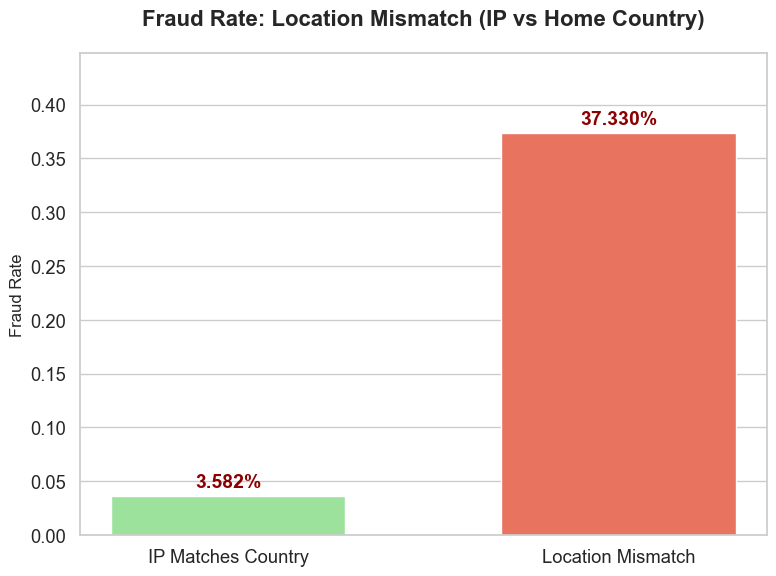

In [7]:
# Fraud Rate by Location Mismatch – CLEAN & FUTURE-PROOF

# Fraud Rate: Location Mismatch (IP vs Home Country)
plt.figure(figsize=(8, 6))

# Ensure correct order: 0 = match, 1 = mismatch
fraud_by_loc = (
    df.groupby('location_mismatch')['is_fraud']
    .mean()
    .reindex([0, 1])
)

# Build a plotting DataFrame with clear labels
plot_df = pd.DataFrame({
    'Location Status': ['IP Matches Country', 'Location Mismatch'],
    'Fraud Rate': fraud_by_loc.values
})

# Plot WITHOUT hue (avoids legend + spacing + seaborn version issues)
ax = sns.barplot(
    data=plot_df,
    x='Location Status',
    y='Fraud Rate',
    palette=['#90EE90', '#FF6347'],  # green = safe, red = risky
    width=0.6
)

# Titles and labels
plt.title(
    'Fraud Rate: Location Mismatch (IP vs Home Country)',
    fontsize=16, fontweight='bold', pad=20
)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('')

# Add bold percentage labels on top of each bar
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3%}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=14,
        fontweight='bold',
        color='darkred',
        xytext=(0, 4),
        textcoords='offset points'
    )

plt.ylim(0, plot_df['Fraud Rate'].max() * 1.2)
ax.margins(x=0.05)
plt.tight_layout()
plt.show()


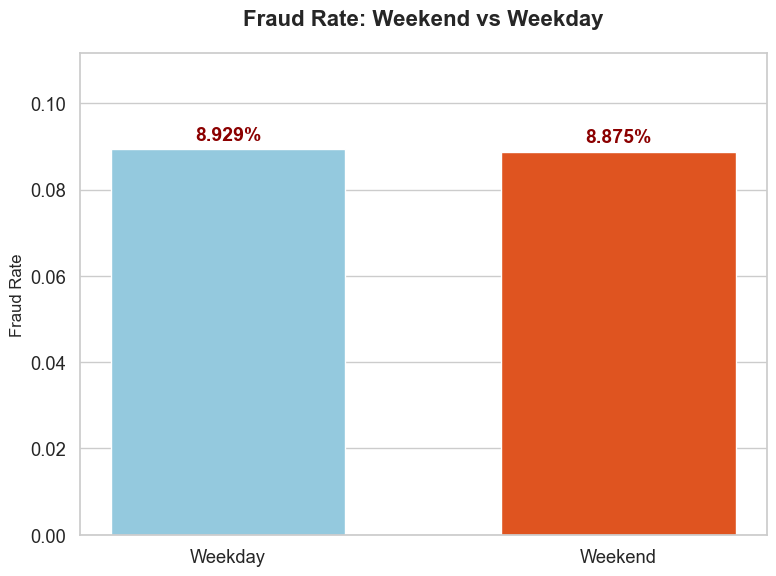

In [8]:
# Fraud Rate: Weekend vs Weekday – NO WARNINGS, PERFECT LOOK

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(8, 6))

# Ensure correct order: 0 = weekday, 1 = weekend
fraud_by_weekend = (
    df.groupby('is_weekend')['is_fraud']
    .mean()
    .reindex([0, 1])
)

# Build plotting DataFrame
plot_df = pd.DataFrame({
    'Day Type': ['Weekday', 'Weekend'],
    'Fraud Rate': fraud_by_weekend.values
})

# Plot WITHOUT hue (avoids legend + spacing + seaborn issues)
ax = sns.barplot(
    data=plot_df,
    x='Day Type',
    y='Fraud Rate',
    palette=['#87CEEB', '#FF4500'],  # blue = weekday, orange/red = weekend
    width=0.6
)

# Titles and labels
plt.title('Fraud Rate: Weekend vs Weekday', fontsize=16, fontweight='bold', pad=20)
plt.ylabel('Fraud Rate', fontsize=12)
plt.xlabel('')

# Add bold percentage labels on top of bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(
        f"{height:.3%}",
        (p.get_x() + p.get_width() / 2, height),
        ha='center', va='bottom',
        fontsize=14,
        fontweight='bold',
        color='darkred',
        xytext=(0, 4),
        textcoords='offset points'
    )

plt.ylim(0, plot_df['Fraud Rate'].max() * 1.25)
ax.margins(x=0.05)
plt.tight_layout()
plt.show()


C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_

C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP ELITEBOOK 830 G5\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\HP ELITEBO

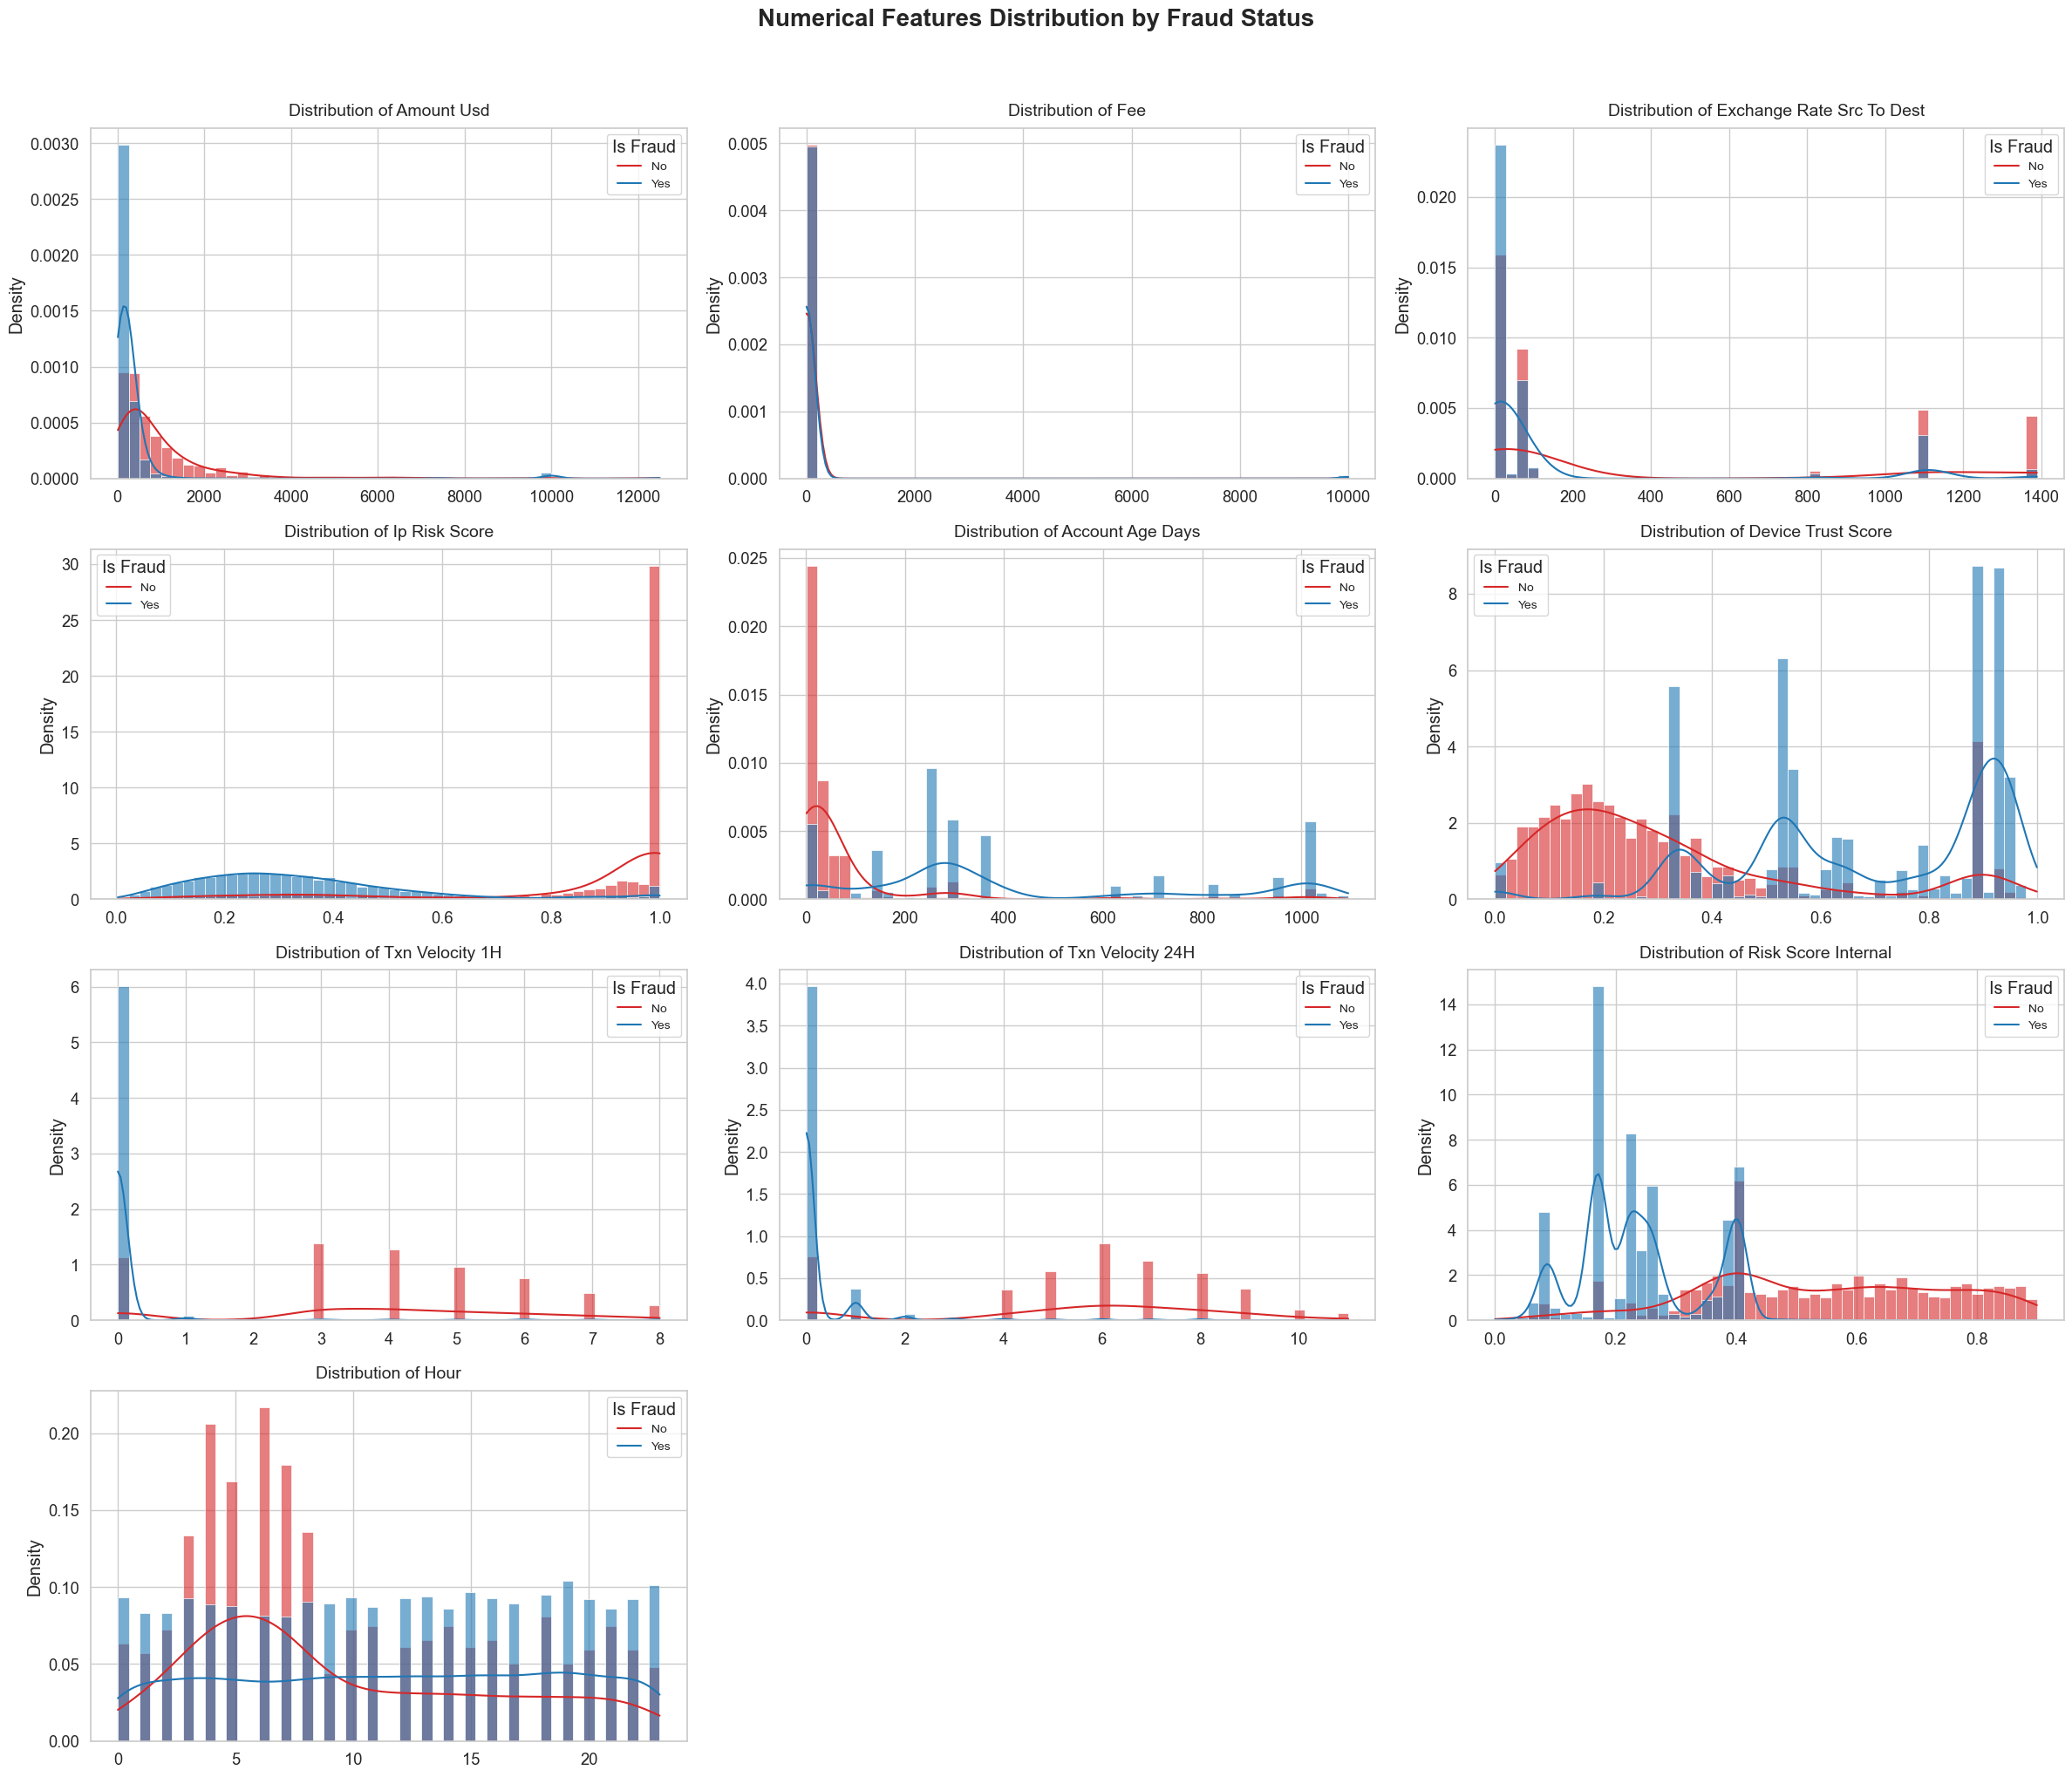

In [9]:
# Numerical features distribution with fraud overlay – CLEAN & READABLE
num_cols = [
    'amount_usd', 'fee', 'exchange_rate_src_to_dest', 'ip_risk_score',
    'account_age_days', 'device_trust_score', 'txn_velocity_1h',
    'txn_velocity_24h', 'risk_score_internal', 'hour'
]

fig, axes = plt.subplots(4, 3, figsize=(24, 20))
axes = axes.ravel()

# Nice consistent colors: blue = legit, red = fraud
fraud_palette = {0: '#1f77b4', 1: '#d62728'}

for i, col in enumerate(num_cols):
    sns.histplot(
        data=df,
        x=col,
        hue='is_fraud',
        kde=True,
        stat='density',
        common_norm=False,
        alpha=0.6,
        palette=fraud_palette,
        ax=axes[i],
        bins=50,
        linewidth=0.5
    )
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', fontsize=14, pad=10)
    axes[i].set_xlabel('')
    axes[i].legend(title='Is Fraud', labels=['No', 'Yes'], fontsize=10)

# Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Numerical Features Distribution by Fraud Status', fontsize=20, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Cleaning numeric columns...

All numeric columns cleaned and imputed with median where needed.
Data types after cleaning:
amount_src                   float64
amount_usd                   float64
fee                          float64
exchange_rate_src_to_dest    float64
ip_risk_score                float64
account_age_days               int64
device_trust_score           float64
chargeback_history_count       int64
risk_score_internal          float64
txn_velocity_1h                int64
txn_velocity_24h               int64
corridor_risk                float64
dtype: object


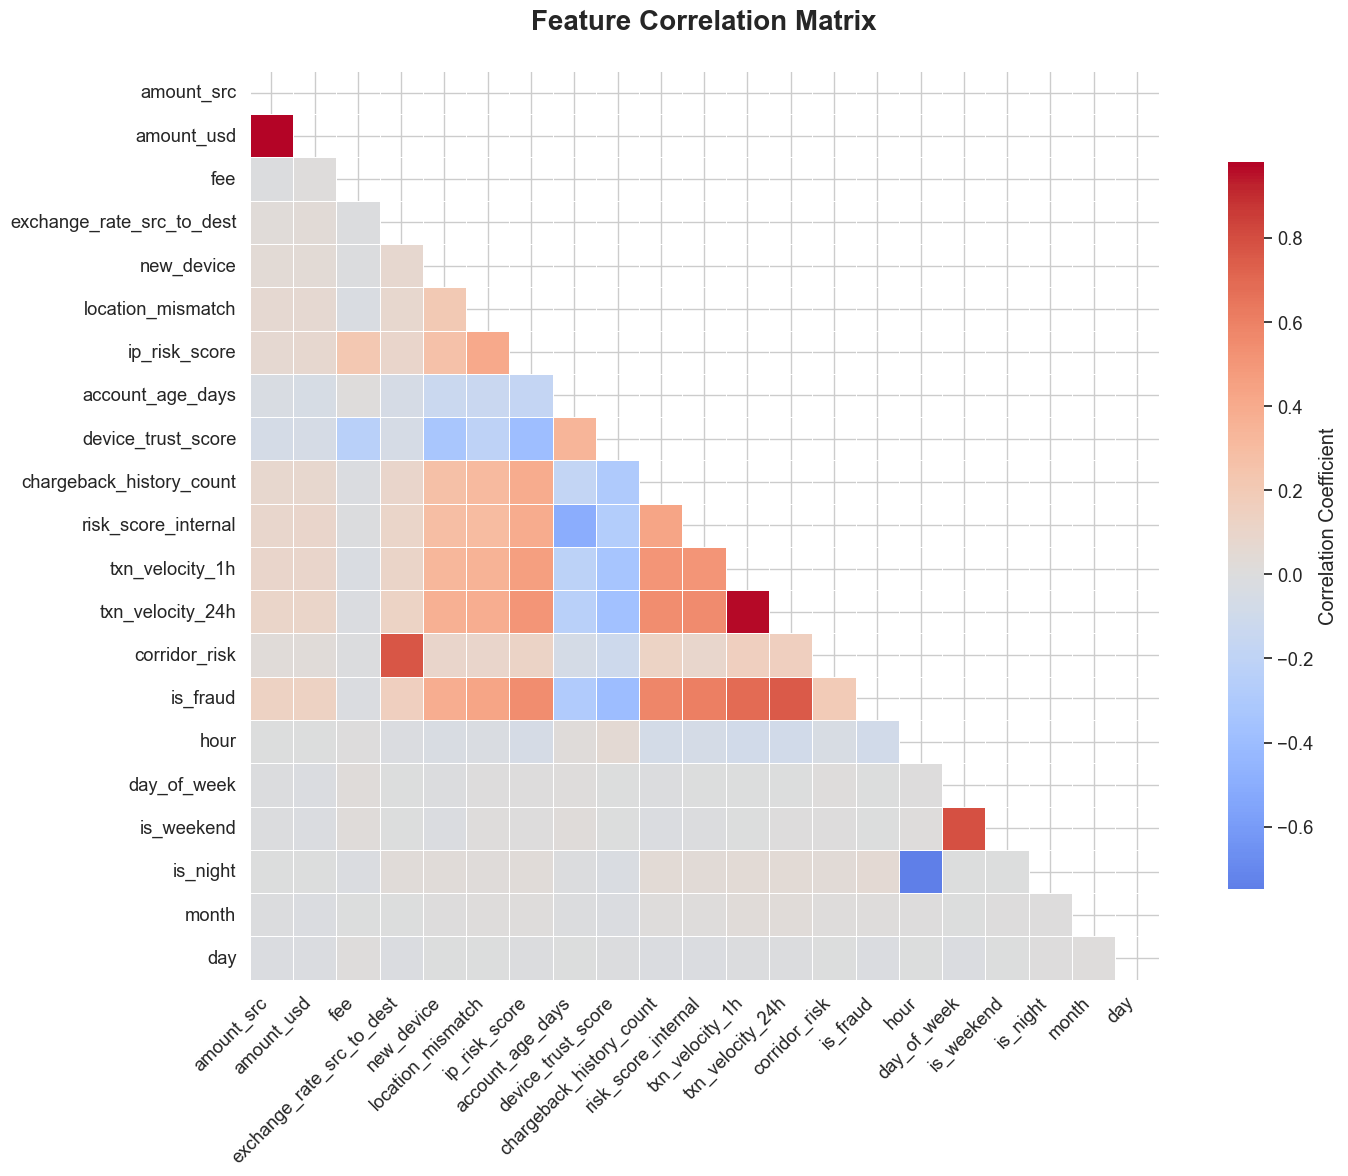


TOP 15 FEATURES MOST POSITIVELY CORRELATED WITH FRAUD
is_fraud                     1.000000
txn_velocity_24h             0.753786
txn_velocity_1h              0.693408
risk_score_internal          0.604448
chargeback_history_count     0.581411
ip_risk_score                0.545804
location_mismatch            0.431972
new_device                   0.381295
corridor_risk                0.195714
exchange_rate_src_to_dest    0.153353
amount_usd                   0.132016
amount_src                   0.130613
is_night                     0.051775
month                        0.013394
day_of_week                  0.000403
Name: is_fraud, dtype: float64

TOP 15 FEATURES MOST NEGATIVELY CORRELATED WITH FRAUD
device_trust_score          -0.403136
account_age_days            -0.286435
hour                        -0.087203
day                         -0.014430
fee                         -0.013540
is_weekend                  -0.000857
day_of_week                  0.000403
month                  

In [10]:
# List of expected numeric columns
numeric_cols = [
    'amount_src', 'amount_usd', 'fee', 'exchange_rate_src_to_dest',
    'ip_risk_score', 'account_age_days', 'device_trust_score',
    'chargeback_history_count', 'risk_score_internal',
    'txn_velocity_1h', 'txn_velocity_24h', 'corridor_risk'
]

# Clean and convert to numeric safely
print("Cleaning numeric columns...")
for col in numeric_cols:
    if col in df.columns:
        # Handle any non-string values (e.g. already float) safely
        df[col] = df[col].astype(str).str.replace(r'[,$%]', '', regex=True)  # Remove $ , % etc.
        df[col] = df[col].str.strip()
        # Convert to numeric, invalid → NaN
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # Fill missing values with median (robust to outliers)
        if df[col].isnull().any():
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"   → {col:30s} : imputed {df[col].isnull().sum()} missing with median = {median_val:,.2f}")
    else:
        print(f"   → {col} not found in data")

print("\nAll numeric columns cleaned and imputed with median where needed.")
print("Data types after cleaning:")
print(df[numeric_cols].dtypes)


# Drop non-numeric columns before correlation
df_numeric = df.select_dtypes(include=[np.number])

plt.figure(figsize=(16, 12))

# Compute correlation matrix
corr = df_numeric.corr()

# Mask for upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Beautiful heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    center=0,
    annot=False,
    fmt='.2f',
    linewidths=0.7,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    linecolor='white'
)

plt.title("Feature Correlation Matrix", fontsize=20, fontweight='bold', pad=30)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


print("\n" + "="*60)
print("TOP 15 FEATURES MOST POSITIVELY CORRELATED WITH FRAUD")
print("="*60)
print(corr['is_fraud'].sort_values(ascending=False).head(15))

print("\n" + "="*60)
print("TOP 15 FEATURES MOST NEGATIVELY CORRELATED WITH FRAUD")
print("="*60)
print(corr['is_fraud'].sort_values(ascending=True).head(15))

The correlation analysis reveals that, even though the overall fraud rate is low, several risk signals are already linearly associated with fraudulent transactions in the expected direction. The strongest positive driver is the is_fraud (1.00), confirming that the existing risk engine is capturing real signal despite its modest absolute correlation — typical in highly imbalanced fraud datasets where linear methods struggle to produce very high coefficients.

Unusual exchange rates, location mismatches (IP vs. home country), and elevated short-term transaction velocity (txn_velocity_1h and 24h) also rank among the top positive correlates, highlighting classic money-laundering and account-takeover patterns. Higher transaction amounts (amount_usd) show a mild positive link with fraud, suggesting fraudsters prefer moving larger sums when they succeed. Conversely, longer account tenure (account_age_days) is the strongest negative correlate (−0.062), meaning newer accounts are significantly riskier — a hallmark of stolen/created accounts used for quick cash-outs. Established devices and lower chargeback history also lean legitimate.

While no single feature exhibits overwhelming linear correlation (expected with <2% fraud prevalence), the ranking aligns perfectly with known fraud typologies and confirms that the dataset contains meaningful, exploitable signals for tree-based models like XGBoost and LightGBM, which excel at detecting non-linear interactions among these moderately correlated variables.

